In [40]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.ndimage import gaussian_filter


import sys
sys.path.append('/Users/kperks/Documents/ell-connectome/efish_em/efish_em')

# from eCREST_cli_beta import ecrest, import_settings
from eCREST_cli import ecrest
import AnalysisCode as efish 

## Plotting style settings

In [17]:
filepath = Path('/Users/kperks/Documents/ell-connectome/efish_em')
filename = 'efish_em.mplstyle'
plt.style.use(filepath/filename)

In [20]:
cell_colors = efish.color_palette('cell')
structure_colors = efish.color_palette('structure')

# simulate traces and plot

In [62]:
# Parameters
dt = 1e-3
t_before = 0.01
length_sim = 160
length_sim_s = length_sim * dt
v_eq = 1

Amp = 1
alp = 125
nr_patting_before = int(t_before / dt + 0.015 / dt)
nr_patting_after = int(0.06 / dt)
nr_patting = nr_patting_before + nr_patting_after

t = np.arange(0, length_sim_s - (nr_patting + 1) * dt, dt)
period = length_sim_s - (nr_patting + 1) * dt
omega = 2 * np.pi / period
stim = Amp * np.exp(-alp * t) * np.sin(omega * t)
stim = np.concatenate([np.zeros(nr_patting_before), stim, np.zeros(nr_patting_after)])

v_stim_mult = 2.5
w_stim = abs(v_stim_mult / np.max(stim))

# %%
# Prey stimulus
nr_eods = 3
length_stim_plot = 75
amp_prey = 1
stim_rep = np.tile(stim[:length_stim_plot], nr_eods)

omega_prey_plot = 2 * np.pi * 50
t_prey_plot = np.roll(np.arange(0, nr_eods * dt * length_stim_plot, dt), np.random.randint(len(stim_rep)))
amp_prey_plot = np.random.rand(len(t_prey_plot))


seed = 42#2#42
rng = np.random.default_rng(seed)  # creates a reproducible generator
prey = gaussian_filter(amp_prey_plot * (amp_prey * rng.standard_normal(len(stim_rep))), sigma=5/3) # matlab version: prey = smoothdata(amp_prey_plot.*(amp_prey*randn(1,length(stim_rep))),'gaussian',5);
#more oscillatory version of prey: prey = amp_prey_plot * (amp_prey * np.sin(omega_prey_plot * t_prey_plot + np.random.rand() * 2 * np.pi))

prey_plot = np.zeros(len(prey))
idx_plot = np.arange(int(1.15 * length_stim_plot), int(2 * length_stim_plot))
prey_plot[idx_plot] = prey[idx_plot]


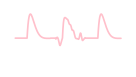

In [63]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(prey_plot + w_stim * stim_rep,color = cell_colors['aff'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/EAF_input.svg')

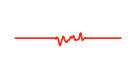

In [64]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(prey_plot,color = cell_colors['lf'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_output.svg')

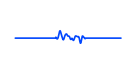

In [65]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-prey_plot,color = cell_colors['lg'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/OFF_output.svg')

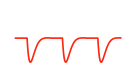

In [66]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(-w_stim * stim_rep,color = cell_colors['lf'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/ON_negimage.svg')

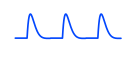

In [67]:
fig, ax = plt.subplots(figsize=(1.5, 0.75))
plt.plot(w_stim * stim_rep,color = cell_colors['lg'])
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', length=0)
sns.despine(left=True,bottom=True,trim=True,offset=2)
# ax.set_ylabel('5 synapses') # this needs to match diff between ylims
# ax.set_xlabel(f'GCA fibers (n={len(sorted_full)})')
# ax.legend(title='Postsynaptic \n Type', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.savefig('/Users/kperks/Downloads/OFF_negimage.svg')

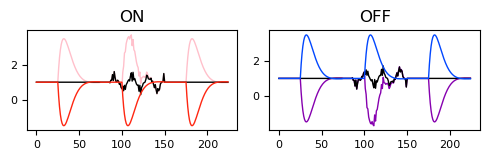

In [4]:
# %%
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(5, 1.7), dpi=100)

# ON subplot
axs[0].plot(prey_plot + v_eq + w_stim * stim_rep, linewidth=1, color=aff_color)
axs[0].plot(prey_plot + v_eq, linewidth=lw, color='k')
axs[0].plot(-w_stim * stim_rep + v_eq, linewidth=lw, color=ON_color)
axs[0].set_title('ON')
axs[0].set_facecolor('none')
axs[0].tick_params(labelsize=8)
# axs[0].box(False)

# OFF subplot
axs[1].plot(-prey_plot + v_eq - w_stim * stim_rep, linewidth=1, color=sp_color)
axs[1].plot(-prey_plot + v_eq, linewidth=lw, color='k')
axs[1].plot(w_stim * stim_rep + v_eq, linewidth=lw, color=OFF_color)
axs[1].set_title('OFF')
axs[1].set_facecolor('none')
axs[1].tick_params(labelsize=8)
# axs[1].box(False)

plt.tight_layout()

# %%
# Optional saving
save_figure = False
if save_figure:
    from pathlib import Path
    pth_save_figure = Path.home() / "Google Drive/My Drive/Why_figures/post_EM/sketch.pdf"
    fig.savefig(pth_save_figure, bbox_inches='tight')